In [51]:
import matplotlib
matplotlib.use('nbagg')
print(matplotlib.get_backend())

import os
import matplotlib.pyplot as plt
from os import listdir
import random
import numpy as np
import cv2 as cv

nbAgg


In [52]:
#loading dataset 
#dataset_location = 'C:/Users/sushl/Downloads/Visual-Odometry-master/Visual-Odometry-master/KITTI_sample/images'
#dataset_location = 'C:/Users/sushl/Downloads/Archives/data_odometry_gray/dataset/sequences/07/image_0'
dataset_location = 'C:/Users/sushl/Desktop/visual odometry/adc'
L = os.listdir(dataset_location)
L.sort()

In [53]:
#ground Truth
#ground_truth = np.loadtxt('C:/Users/sushl/Downloads/Visual-Odometry-master/Visual-Odometry-master/KITTI_sample/poses.txt',delimiter = ' ')
ground_truth = np.loadtxt('C:/Users/sushl/Downloads/Archives/data_odometry_poses/dataset/poses/07.txt',delimiter = ' ')
ground_truth.shape
gx = ground_truth[:400,3]
gz = ground_truth[:400,11]

In [54]:
#calibration matrix
"""
k =np.array([[7.188560000000e+02, 0.000000000000e+00, 6.071928000000e+02], 
             [0.000000000000e+00, 7.188560000000e+02, 1.852157000000e+02], 
             [0.000000000000e+00, 0.000000000000e+00, 1.000000000000e+00]])

"""
k = np.array([[518.56666108, 0., 329.45801792],
    [0., 518.80466479, 237.05589955],
    [  0., 0., 1.]])

sift = cv.SIFT_create()
bf = cv.BFMatcher()
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()


In [71]:
def keypoints(img,Threshold=80):
    fast = cv.FastFeatureDetector_create()
    fast.setNonmaxSuppression(1)
    fast.setThreshold(Threshold)
    kp = fast.detect(img,None)
    pt = np.float32([ kp[m].pt for m in range(len(kp))]).reshape(-1,1,2)
    return kp,pt 

In [72]:
def keypoints(img):
    corners = cv.goodFeaturesToTrack(img, mask = None, maxCorners = 800, qualityLevel = 0.01, minDistance = 1, blockSize = 5, useHarrisDetector = True, k = 0.04  )
    #print(corners.shape)
    #print(corners.shape,corners)
    return corners,corners

In [73]:
def optical_flow_matches(img,trig_frame,pt1,window_size):
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (window_size,window_size),
                      maxLevel = 2,
                      criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
    ptimg, st, err = cv.calcOpticalFlowPyrLK(trig_frame, img, pt1, None, **lk_params)

    pt1i, st, err = cv.calcOpticalFlowPyrLK(img, trig_frame, ptimg, None, **lk_params)
    return ptimg,pt1i

In [74]:
def point3D(k,R,t,pts1,pts2):
    rt = np.zeros((3,4))
    rt[:3,:3] = np.identity(3)
    projMatr1 = k@rt
    rt2 = np.zeros((3,4))
    rt2[:3,:3] = R
    rt2[:,3] = t.reshape((3))
    projMatr2 = k@rt2
    points4D = cv.triangulatePoints(projMatr1,projMatr2,pts1 ,pts2)
    points3D = points4D / points4D[3,:]
    return points3D.T[:,:3]

In [75]:
"""
#for first two images
img1 = cv.imread(dataset_location +'/'+ L[0],cv.IMREAD_GRAYSCALE)
img2 = cv.imread(dataset_location +'/'+ L[1],cv.IMREAD_GRAYSCALE)
pts,kp1= keypoints(img1)
kp2,kp1 = optical_flow_matches(img2,img1,kp1,10)

E, mask = cv.findEssentialMat(kp1,kp2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)
#inlier points
pts1 = kp1[mask.ravel()==1]
pts2 = kp2[mask.ravel()==1]
matches = {}
#print(tuple(kp1[0].flatten()))
for i in range(len(pts2)):
    matches[tuple(pts1[i].flatten())] = tuple(pts2[i].flatten())
print(matches)
#recovering pose info
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k)
#print(t)
pointcloud = point3D(k,R,t,pts1,pts2)
retval, rvec, t, inliers = cv.solvePnPRansac(pointcloud,pts2, k, (0,0,0,0),useExtrinsicGuess = True ,iterationsCount = 100,reprojectionError = 8.0,confidence = 0.90,flags = 1)
R,Jec = cv.Rodrigues(rvec)
print(t,len(inliers))
translations = []
rotations = []
for i in range(3,15):
    img3 = cv.imread(dataset_location +'/'+ L[i],cv.IMREAD_GRAYSCALE)
    kp3,kp2i = optical_flow_matches(img3,img2,pts2,10)
    #pointcloud = point3D(k,R,t,kp1,kp2)
    matches32 = {}
    for i in range(len(pts2)):
        matches32[tuple(pts2[i].flatten())] = tuple(kp3[i].flatten())
    print(matches32)
    #print(len(kp3),len(kp2))
    retval, rvec, tvec, inliers = cv.solvePnPRansac(pointcloud,kp3, k, (0,0,0,0),useExtrinsicGuess = True ,iterationsCount = 100,reprojectionError = 8.0,confidence = 0.90,flags = 1)
    R3,Jec = cv.Rodrigues(rvec)
    print(tvec,len(inliers))   
    translations.append(tvec)
    rotations.append(R3)

"""


"\n#for first two images\nimg1 = cv.imread(dataset_location +'/'+ L[0],cv.IMREAD_GRAYSCALE)\nimg2 = cv.imread(dataset_location +'/'+ L[1],cv.IMREAD_GRAYSCALE)\npts,kp1= keypoints(img1)\nkp2,kp1 = optical_flow_matches(img2,img1,kp1,10)\n\nE, mask = cv.findEssentialMat(kp1,kp2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)\n#inlier points\npts1 = kp1[mask.ravel()==1]\npts2 = kp2[mask.ravel()==1]\nmatches = {}\n#print(tuple(kp1[0].flatten()))\nfor i in range(len(pts2)):\n    matches[tuple(pts1[i].flatten())] = tuple(pts2[i].flatten())\nprint(matches)\n#recovering pose info\nretval, R, t, mask = cv.recoverPose(E, pts1, pts2, k)\n#print(t)\npointcloud = point3D(k,R,t,pts1,pts2)\nretval, rvec, t, inliers = cv.solvePnPRansac(pointcloud,pts2, k, (0,0,0,0),useExtrinsicGuess = True ,iterationsCount = 100,reprojectionError = 8.0,confidence = 0.90,flags = 1)\nR,Jec = cv.Rodrigues(rvec)\nprint(t,len(inliers))\ntranslations = []\nrotations = []\nfor i in range(3,15):\n    img3 = cv.imread(data

In [76]:

"""    
        else:
            i1 = cv.imread(dataset_location +'/'+ L[a-1],cv.IMREAD_GRAYSCALE)
            i2 = cv.imread(dataset_location +'/'+ L[a],cv.IMREAD_GRAYSCALE)
            pt,k1= keypoints(img1)
            k2,k1 = optical_flow_matches(i2,i1,k1,15)

            E, mask = cv.findEssentialMat(k1,k2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)

            #inlier points
            p1 = k1[mask.ravel()==1]
            p2 = k2[mask.ravel()==1]
            retval, r, ta, mask = cv.recoverPose(E, p1, p2, k)
            translations.append(translations[a-1] + rotations[a-1]@ta)
            #print(len(translations))
            rotations.append(rotations[a-1]@r)
            count = 0
            match = 210
            print('else')
            count = count + 1
            if count >3:
                break
        """

"    \n        else:\n            i1 = cv.imread(dataset_location +'/'+ L[a-1],cv.IMREAD_GRAYSCALE)\n            i2 = cv.imread(dataset_location +'/'+ L[a],cv.IMREAD_GRAYSCALE)\n            pt,k1= keypoints(img1)\n            k2,k1 = optical_flow_matches(i2,i1,k1,15)\n\n            E, mask = cv.findEssentialMat(k1,k2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)\n\n            #inlier points\n            p1 = k1[mask.ravel()==1]\n            p2 = k2[mask.ravel()==1]\n            retval, r, ta, mask = cv.recoverPose(E, p1, p2, k)\n            translations.append(translations[a-1] + rotations[a-1]@ta)\n            #print(len(translations))\n            rotations.append(rotations[a-1]@r)\n            count = 0\n            match = 210\n            print('else')\n            count = count + 1\n            if count >3:\n                break\n        "

In [88]:
#for first two images
img1 = cv.imread(dataset_location +'/'+ L[0],cv.IMREAD_GRAYSCALE)
img2 = cv.imread(dataset_location +'/'+ L[1],cv.IMREAD_GRAYSCALE)
pts,kp1= keypoints(img1)
kp2,kp1 = optical_flow_matches(img2,img1,kp1,21)
print(len(kp1))
E, mask = cv.findEssentialMat(kp1,kp2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)

#inlier points
pts1 = kp1[mask.ravel()==1]
pts2 = kp2[mask.ravel()==1]

#recovering pose info
retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k)
pointcloud = point3D(k,R,t,pts1,pts2)
retval, rvec, t, inliers = cv.solvePnPRansac(pointcloud,pts2, k, (0,0,0,0),useExtrinsicGuess = True ,iterationsCount = 100,reprojectionError = 8.0,confidence = 0.90,flags = 1)
R,Jec = cv.Rodrigues(rvec)
#set of translations and rotations
translations = []
rotations = []
a = 0
t0 = np.zeros((3,1))
r0 = np.identity(3)

#storing previous imgs
framep1 = img1[:]
framep2 = img2[:]
Rp = R[:]
Tp = t[:]
t0 = np.zeros((3,1))
r0 = np.identity(3)
match = 20000
count = 0
error_set = []
error_set.append(0)
ntcframe = 0
#for remaining images
while(a < 500):#
    print(a)
    img3 = cv.imread(dataset_location +'/'+ L[a],cv.IMREAD_GRAYSCALE)
    kp3,kp2i = optical_flow_matches(img3,img2,pts2,10)
    #match = len(kp3)
    #print(match)
    #count = 0
    #match = threshold for pnp i.e it inliers of previous frame are greater than this threshold we will use pnp directly
    if match > 200: #or error_set[a-1]< 10 :
        retval, rvec, tvec, inliers = cv.solvePnPRansac(pointcloud,kp3, k, (0,0,0,0),useExtrinsicGuess = True ,iterationsCount = 100,reprojectionError = 5.0,confidence = 0.750,flags = 1)
        R3,Jec = cv.Rodrigues(rvec)
        #print(tvec,len(inliers))   
        #translations.append(tvec)
        #rotations.append(R3)
        match = len(inliers)
        #print(match)
        p3d = np.ones((4,pointcloud.shape[0]))
        p3d[:3,:] = pointcloud.T
        projection_mat = np.zeros((3,4))
        projection_mat[:3,:3] = r0@R3
        projection_mat[:,3] = (t0 + r0@tvec).reshape((3))
        proj_pt = k@projection_mat@p3d
        proj_pt = proj_pt.T
        proj_pt= proj_pt / proj_pt[:,2].reshape((-1,1))
        proj_pt = proj_pt[:,:2]
        err = proj_pt - kp3.reshape((-1,2))
        norm_err = np.linalg.norm(err, axis=1)
        error_set.append(np.min(norm_err))
        #print(match,error_set[a])
        if ((a==0 or a==1)or np.linalg.norm(t0 + r0@tvec - translations[a-1-ntcframe])< 5*np.linalg.norm(translations[a-1-ntcframe]-translations[a-2-ntcframe])):
            translations.append(t0 + r0@tvec)
            #print(len(translations))
            rotations.append(r0@R3)
        
        elif np.linalg.norm(t0 + r0@tvec - translations[a-1-ntcframe])> 5*np.linalg.norm(translations[a-1-ntcframe]-translations[a-2-ntcframe]):
            ntcframe = ntcframe + 1
            print('abcd')
        
        print(np.linalg.norm(t0 + r0@tvec - translations[a-1-ntcframe]),translations[a-ntcframe])
        count = 0
        
        
    #else will trigulated point cloud from previous two imgs
    else:
        img1 = cv.imread(dataset_location +'/'+ L[a-2],cv.IMREAD_GRAYSCALE)
        img2 = cv.imread(dataset_location +'/'+ L[a-1],cv.IMREAD_GRAYSCALE)
        pts,kp1= keypoints(img1)
        kp2,kp1 = optical_flow_matches(img2,img1,kp1,15)

        E, mask = cv.findEssentialMat(kp1,kp2,k,cv.RANSAC, prob = 0.999,threshold = 0.4,mask=None)

        #inlier points
        pts1 = kp1[mask.ravel()==1]
        pts2 = kp2[mask.ravel()==1]
        
        r0 = rotations[a-2-ntcframe]
        t0 = translations[a-2-ntcframe]
        retval, R, t, mask = cv.recoverPose(E, pts1, pts2, k)
        pointcloud = point3D(k,R,t,pts1,pts2)
        #error_set.append(2)
        a = a-1
        match = 20000
        print('me')
        count = count + 1
        if count >3:
            break
            
    
    a = a+1

800
0
0.0 [[-0.01501241]
 [-0.20426927]
 [ 0.39860754]]
1
1.1035101626519617 [[ 0.57457931]
 [ 0.23165139]
 [-0.42606783]]
2
1.068500276483315 [[ 0.38388392]
 [-0.02970502]
 [-1.44441008]]
3
0.6780156527795977 [[ 0.84275362]
 [ 0.2854194 ]
 [-1.05731781]]
4
0.4732792515563173 [[ 1.23138417]
 [ 0.43258433]
 [-1.28381732]]
5
1.7335381012970026 [[ 2.46843513]
 [ 0.71924584]
 [-0.1036968 ]]
6
3.301131396758372 [[1.44458259]
 [2.08514195]
 [2.72181594]]
7
5.779814488944077 [[ 2.59388021]
 [ 2.04254025]
 [-2.94241883]]
8
3.290616517625146 [[ 1.2512796 ]
 [-0.33125319]
 [-4.78380021]]
9
1.3024865144954423 [[ 1.69234213]
 [-0.86637712]
 [-5.88633245]]
10
1.1583618263910982 [[ 1.34077246]
 [ 0.08764828]
 [-5.33132216]]
11
5.088058848044688 [[  1.27775694]
 [  0.17905799]
 [-10.41816953]]
12
1.494801227000458 [[ 2.46425532]
 [ 0.03998042]
 [-9.51966536]]
13
3.9188038758722756 [[  5.18125932]
 [  1.16598582]
 [-12.1094578 ]]
14
5.1007213915833045 [[ 2.02043527]
 [-1.70939945]
 [-9.32401178]]
15
7

0.006026991696565975 [[ 2.34059566]
 [-5.09794697]
 [-1.38271072]]
116
0.01560172611105958 [[ 2.34269007]
 [-5.09494566]
 [-1.39787711]]
117
0.0037327759915066114 [[ 2.34173988]
 [-5.09484396]
 [-1.39426873]]
118
0.0015197390881848923 [[ 2.34049323]
 [-5.09440292]
 [-1.3950177 ]]
119
0.006667318398189199 [[ 2.34137273]
 [-5.09241748]
 [-1.40132148]]
120
0.009816314902089169 [[ 2.33726918]
 [-5.09487925]
 [-1.39275056]]
121
0.005129730456374051 [[ 2.33843473]
 [-5.09507853]
 [-1.39774215]]
122
abcd
0.030507245701928136 [[ 2.33843473]
 [-5.09507853]
 [-1.39774215]]
123
0.023096617943511415 [[ 2.33801047]
 [-5.08261865]
 [-1.41718502]]
124
0.0025342351937378904 [[ 2.33764878]
 [-5.08182819]
 [-1.41480454]]
125
0.0019212283146570986 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
126
abcd
0.030905803913516803 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
127
abcd
1.3636255820861298 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
128
abcd
0.03868034840811581 [[ 2.33584944]
 [-5.08201295]
 [-1.4

me
230
abcd
1.0611877771283262 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
231
abcd
93.61862011102592 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
232
abcd
14.613714968589239 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
233
abcd
4.953796973157351 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
234
me
234
abcd
510.3764332949278 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
235
abcd
382.29689231182823 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
236
me
236
abcd
0.612407323619548 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
237
abcd
1.1586577566978171 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
238
abcd
1.4175091184541981 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
239
abcd
1.8560247301493025 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
240
abcd
1.8907563378141439 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
241
me
241
abcd
8.070217372729292 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
242
abcd
158.4165248588555 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
243
abcd
16.03869889

abcd
10.732730058180897 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
353
abcd
7.95760397125089 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
354
abcd
12.70369726081891 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
355
abcd
10.451456087233 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
356
abcd
5.551401809648785 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
357
abcd
18.016839195822453 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
358
abcd
20.65223202733906 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
359
abcd
12.342772313404483 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
360
abcd
11.856130718879397 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
361
abcd
6.212113611865817 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
362
me
362
abcd
1854.6316513642637 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
363
abcd
41.70597887890177 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
364
abcd
633.9536347180539 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
365
abcd
1654.8622702500818 [[ 2.33584944]
 [-

abcd
2417.7591525745 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
464
abcd
4222.6515739788165 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
465
me
465
abcd
1192.401013331926 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
466
abcd
1203.252222101305 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
467
abcd
1292.6838487728546 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
468
me
468
abcd
1.0845744193020512 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
469
abcd
1.0924615352755405 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
470
abcd
0.9936610786042462 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
471
abcd
1.0271629809606506 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
472
me
472
abcd
17.385195022675052 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
473
abcd
33.79083409962933 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
474
abcd
51.03854382115943 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
475
abcd
2.112047192050677 [[ 2.33584944]
 [-5.08201295]
 [-1.41415697]]
476
abcd
5.353827607326161 [[

<IPython.core.display.Javascript object>


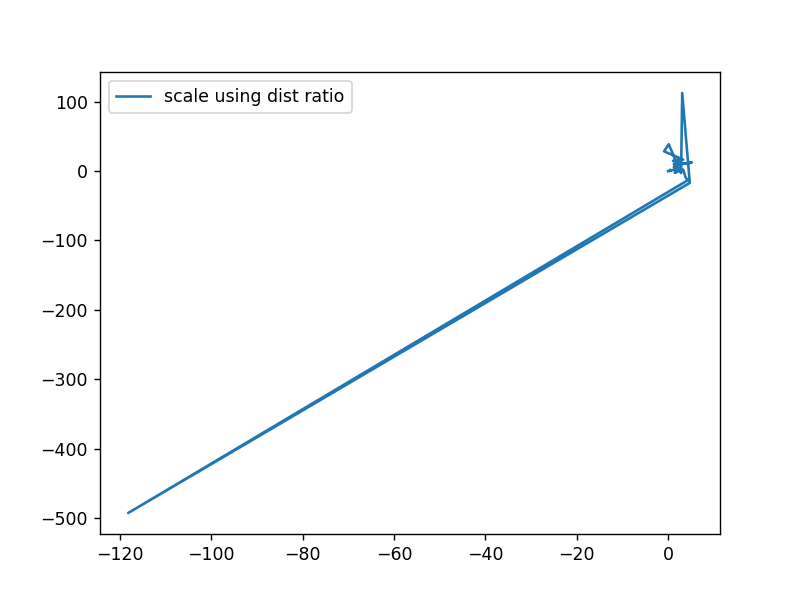

In [89]:
x0 = []
y0 = []
go = []
g1 = []
for i in range(len(translations)-1):
    y0.append(-1*translations[i][2])
    x0.append(translations[i][0])
    
fig,axes = plt.subplots()
axes.plot(x0, y0,label = 'scale using dist ratio')
#axes.plot(gx, gz,color = 'red',label = 'ground_truth')
axes.legend()

plt.show()

<IPython.core.display.Javascript object>


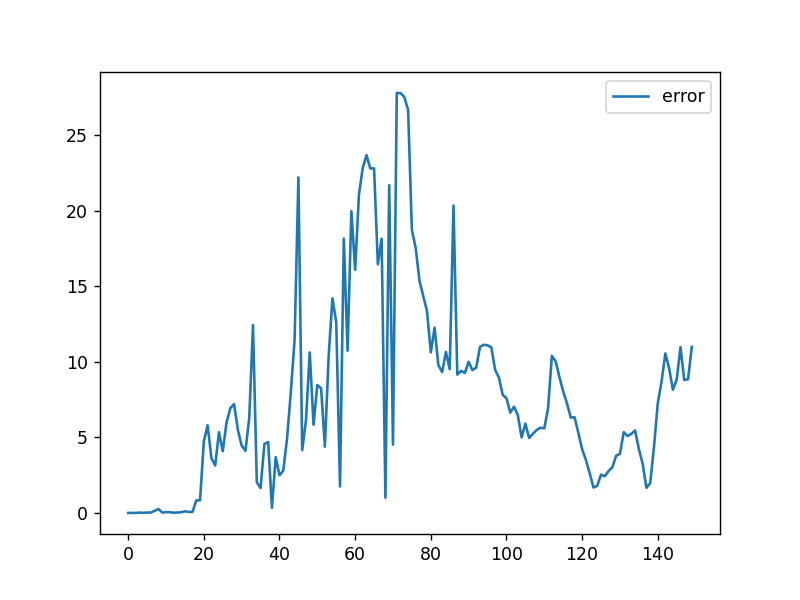

In [87]:
x0 = []
y0 = []
for i in range(150):#len(error_set)-1
    y0.append(error_set[i])
    x0.append(i)
    
fig,axes = plt.subplots()
axes.plot(x0, y0,label = 'error')
axes.legend()

plt.show()

In [14]:
print(len(translations)-1)

6


In [14]:
import numpy as np
import cv2 as cv
import argparse
parser = argparse.ArgumentParser(description='This sample demonstrates Lucas-Kanade Optical Flow calculation. \
                                              The example file can be downloaded from: \
                                              https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')
parser.add_argument('image', type=str, help='path to image file')
args = parser.parse_args()
cap = cv.VideoCapture(args.image)
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

usage: ipykernel_launcher.py [-h] image
ipykernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

C:\Users\sushl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
